# Boston Housing with Linear Regression

** With this data our objective is create a model using linear regression to predict the houses price  **

The data contains the following columns:
* 'crim': per capita crime rate by town.
* 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
* 'indus': proportion of non-retail business acres per town.
* 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* 'nox': nitrogen oxides concentration (parts per 10 million).
* 'rm': average number of rooms per dwelling.
* 'age': proportion of owner-occupied units built prior to 1940.
* 'dis': weighted mean of distances to five Boston employment centres.
* 'rad': index of accessibility to radial highways.
* 'tax': full-value property-tax rate per $10,000.
* 'ptratio': pupil-teacher ratio by town
* 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* 'lstat': lower status of the population (percent).
* 'medv': median value of owner-occupied homes in $$1000s

**Lets Start**

First we need to prepare our enviroment importing some librarys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing DataSet and take a look at Data
BostonTrain = pd.read_csv("/content/4_train.csv")

** Here we can look at the BostonTrain data **

In [ ]:
BostonTrain.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
BostonTrain.info()
BostonTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

In [ ]:
#ID columns does not relevant for our analysis.
BostonTrain.drop('ID', axis = 1, inplace=True)

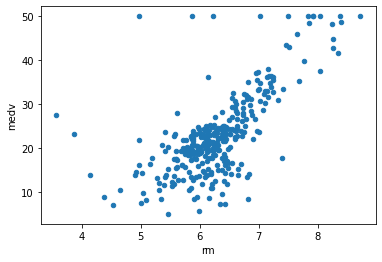

In [ ]:
BostonTrain.plot.scatter('rm', 'medv')

In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

** Now lets take a loot how the all variables relate to each other. **

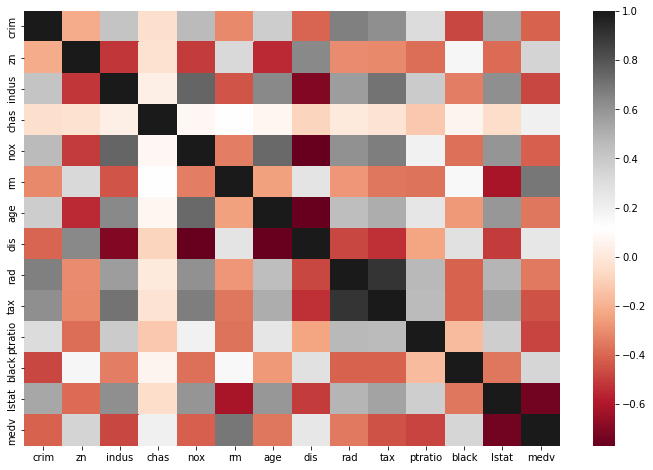

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation                           
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation                               
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

**Lets plot the paiplot, for all different correlations**

Negative Correlation. 

When x is high y is low and vice versa.

To the right less negative correlation.

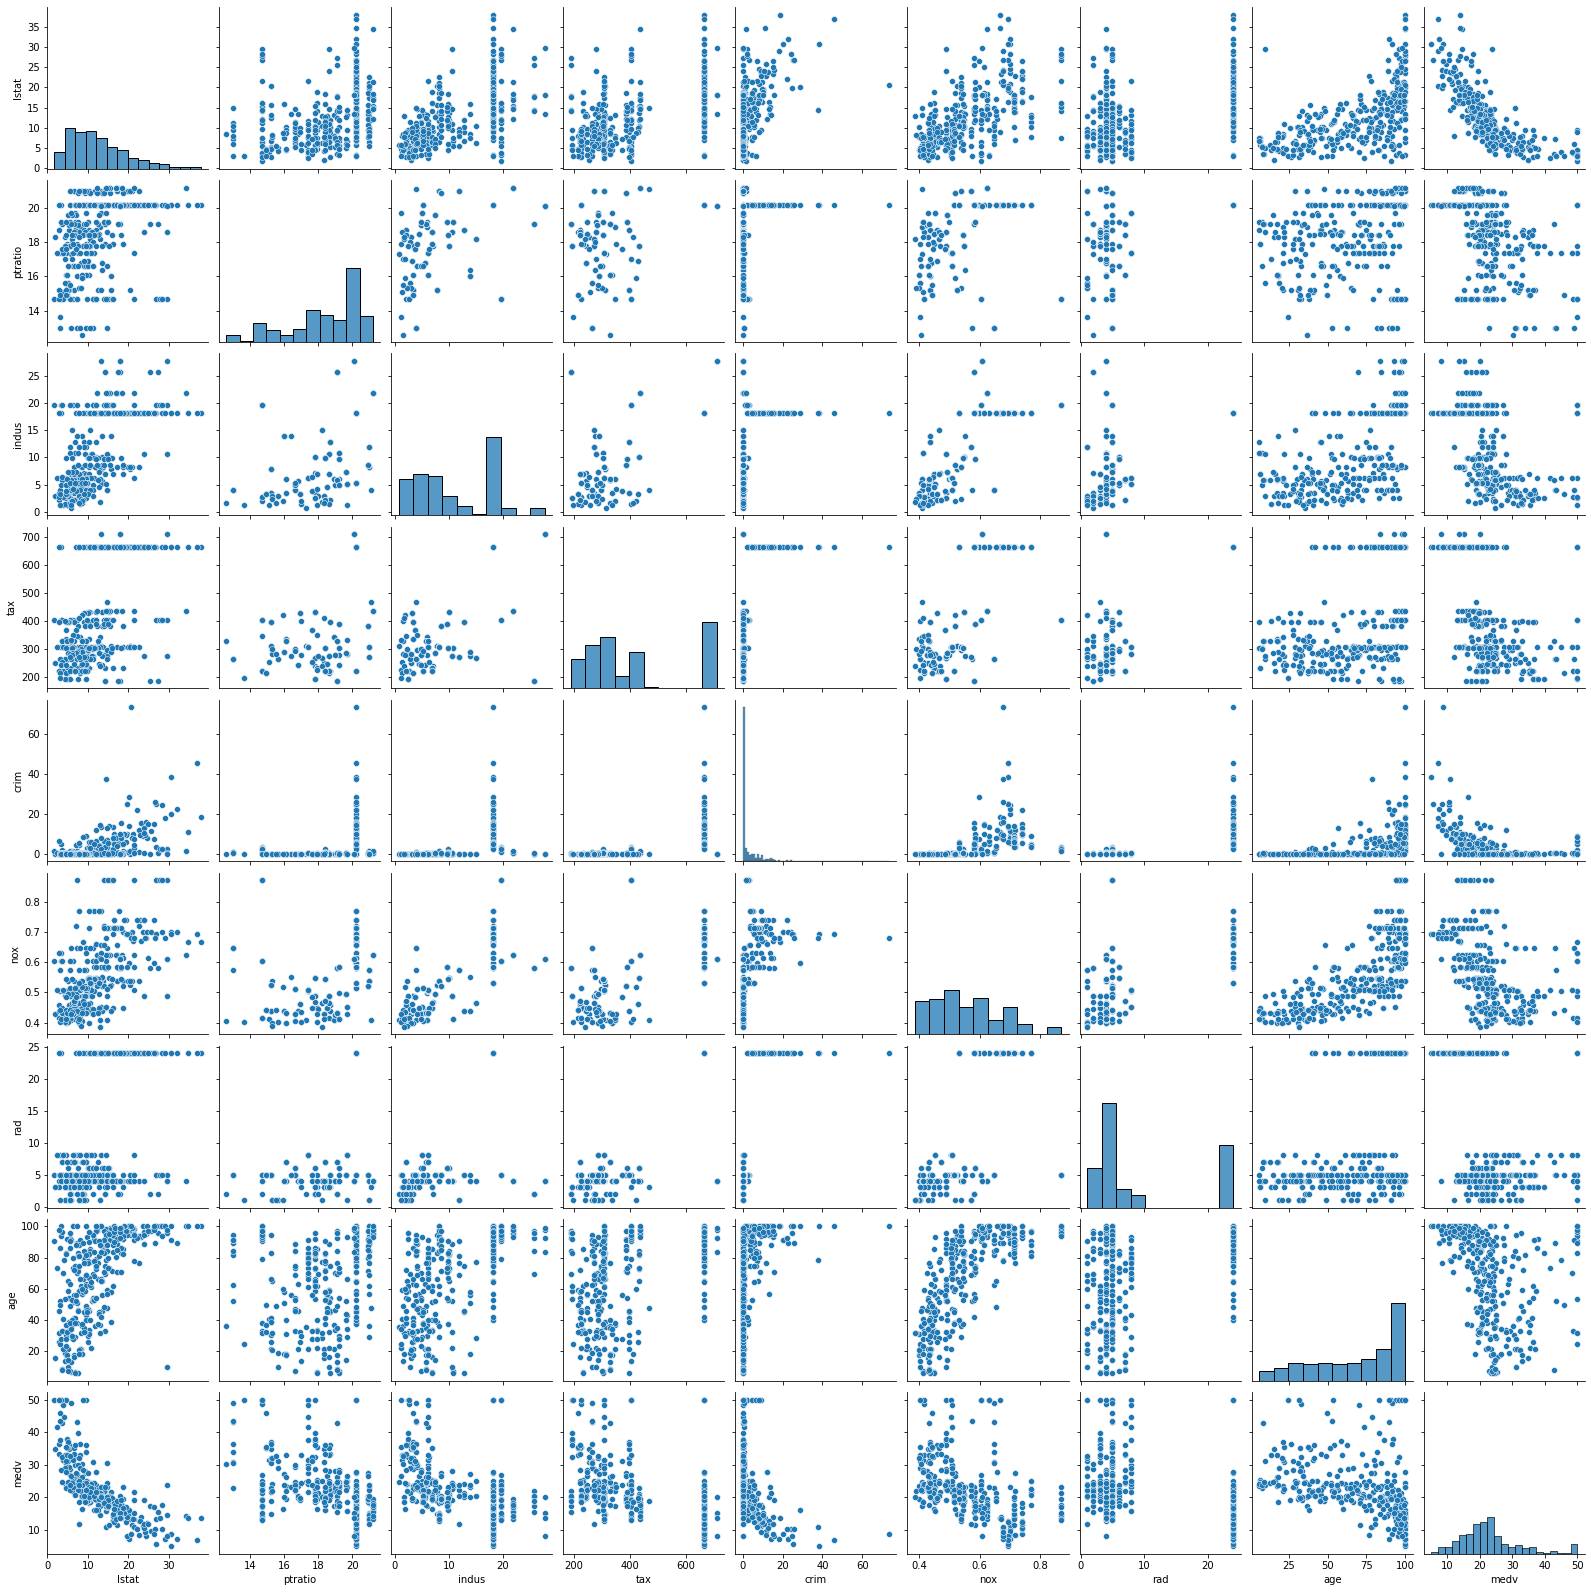

In [ ]:
sns.pairplot(BostonTrain, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

Zero Correlation. When x and y are completely independent

Positive Correlation. When x and y go together

to the right more independent.

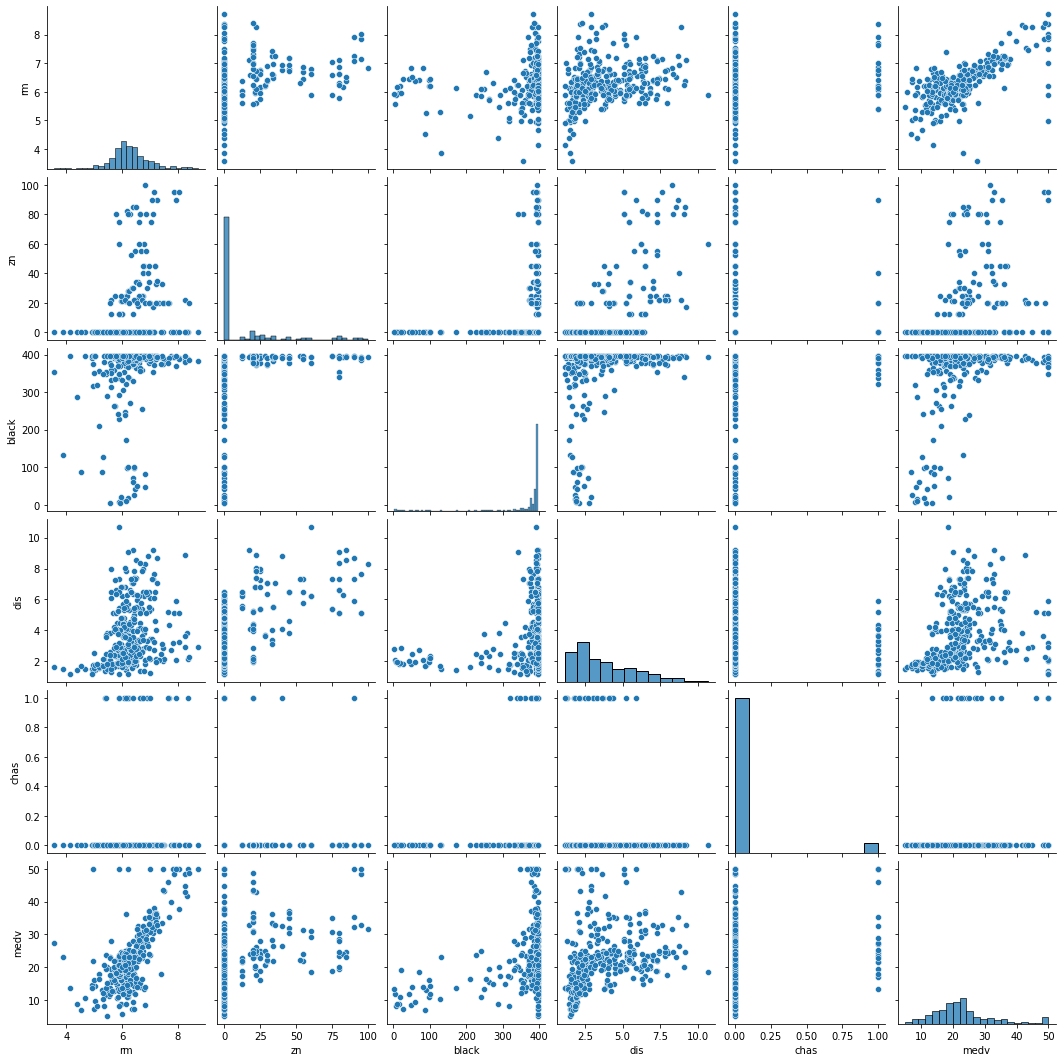

In [ ]:
sns.pairplot(BostonTrain, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])

# Trainning Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable

In [ ]:
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

**Import sklearn librarys:**    
train_test_split, to split our data in two DF, one for build a model and other to validate.                                     
LinearRegression, to apply the linear regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

Text(0, 0.5, 'Predicted Y')

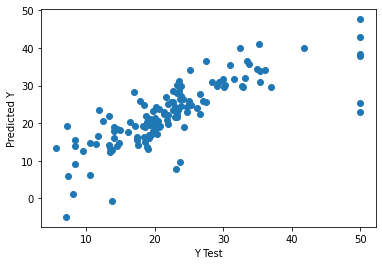

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.856902995559538
MSE: 33.30445486561928
RMSE: 5.771001201318475


Considering the RMSE: we can conclude that  this model average error is RMSE at medv, which means RMSE *1000  in money

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


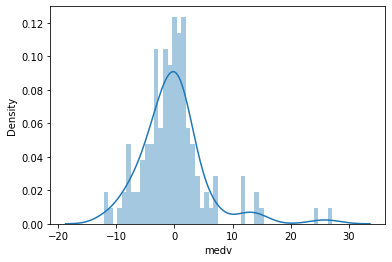

In [ ]:
sns.distplot((y_test-predictions),bins=50);

As more normal distribution, better it is.

In [ ]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.058443
zn,0.038555
indus,-0.014207
chas,6.833470
nox,-5.679074
rm,4.935415
age,-0.008900
dis,-1.501416
rad,0.296900
tax,-0.014850


How to interpret those coefficients:
    they are in function of Medv, so 
    
    for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
    for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.

*1000 because the medv is in 1000
and this apply to the other variables/coefficients.
    